In [1]:
import joblib
import numpy as np

### extracting ckks data (with rescaling)

In [2]:
file_path = 'variables_ckks.pkl'

data = joblib.load(file_path)

weights_unenc_ckks, bias_unenc_ckks, accuracy_ckks, y_pred_unenc_ckks, cpu_seconds_ckks, cpu_usages_ckks, ram_usages_ckks, train_time_ckks, testing_time_ckks = data

### extracting ckks data (without rescaling)

In [3]:
file_path = 'variables_ckks2.pkl'

data = joblib.load(file_path)

weights_unenc_ckks2, bias_unenc_ckks2, accuracy_ckks2, y_pred_unenc_ckks2, cpu_seconds_ckks2, cpu_usages_ckks2, ram_usages_ckks2, train_time_ckks2, testing_time_ckks2 = data

### extractng skleanr data

In [4]:
file_path = 'variables_sklearn.pkl'

data = joblib.load(file_path)

weights_unenc_sklearn, bias_unenc_sklearn, accuracy_sklearn, y_pred_unenc_sklearn, cpu_seconds_sklearn, cpu_usages_sklearn, ram_usages_sklearn, train_time_sklearn, testing_time_sklearn = data

### extracting paillier data:

In [5]:
file_path = 'variables_paillier.pkl'

data = joblib.load(file_path)

weights_unenc_paillier, bias_unenc_paillier, accuracy_paillier, y_pred_unenc_paillier, cpu_seconds_paillier, cpu_usages_paillier, ram_usages_paillier, train_time_paillier, testing_time_paillier = data

### evaluating precision of ckks

In [6]:
from scipy.stats import spearmanr
correlation, p_value = spearmanr(weights_unenc_sklearn, weights_unenc_ckks)

# Print the results
print(f"Spearman rank correlation coefficient: {correlation}")
print(f"P-value: {p_value}")

Spearman rank correlation coefficient: 0.9749999999999999
P-value: 7.14370596522927e-10


In [7]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(weights_unenc_sklearn, weights_unenc_ckks)

# Print the result
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.0007999335880500647


### evaluating precision of ckks (without rescaling):

In [8]:
correlation, p_value = spearmanr(weights_unenc_sklearn, weights_unenc_ckks2)

# Print the results
print(f"Spearman rank correlation coefficient: {correlation}")
print(f"P-value: {p_value}")

Spearman rank correlation coefficient: 0.9107142857142855
P-value: 2.395020837207069e-06


In [9]:
mse = mean_squared_error(weights_unenc_sklearn, weights_unenc_ckks2)

# Print the result
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.0032563134870578223


### evaluating precision of paillier:

In [10]:
correlation, p_value = spearmanr(weights_unenc_sklearn, weights_unenc_paillier)

# Print the results
print(f"Spearman rank correlation coefficient: {correlation}")
print(f"P-value: {p_value}")

Spearman rank correlation coefficient: 0.9571428571428571
P-value: 2.2736751556259742e-08


In [11]:
mse = mean_squared_error(weights_unenc_sklearn, weights_unenc_paillier)

# Print the result
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.0009813261885918058


In [12]:
weights_unenc_sklearn

array([ 0.17159877,  0.16312793, -0.05983747, -0.07675724,  0.03326291,
        0.15348267,  0.16081213,  0.08975505, -0.04689947, -0.02051346,
        0.21089264,  0.04306988,  0.01110416, -0.04285159,  0.12872448])

In [13]:
weights_unenc_paillier

[0.18879413446861862,
 0.245188586604009,
 -0.07448711421265881,
 -0.0596466794609611,
 0.05807134926163306,
 0.1327347763307259,
 0.18189499483260396,
 0.0876125123438375,
 -0.0668735730885828,
 0.0031575099019547008,
 0.20579786818070558,
 0.021501304772387285,
 -0.044669065185751984,
 -0.06484002780467564,
 0.15408750657387402]

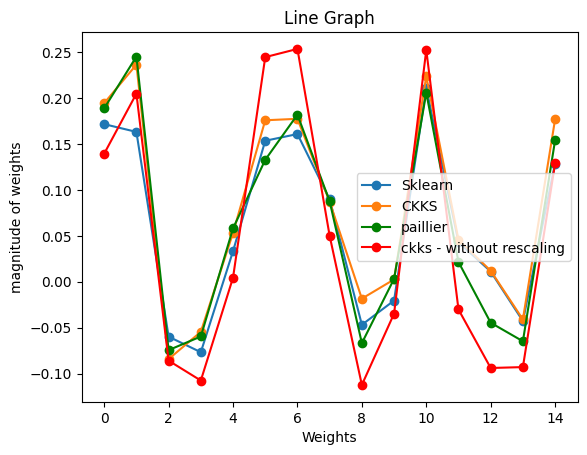

In [14]:
import matplotlib.pyplot as plt

plt.plot(weights_unenc_sklearn, label='Sklearn', marker='o')  
plt.plot(weights_unenc_ckks, label='CKKS', marker='o')  
plt.plot(weights_unenc_paillier, label='paillier', marker='o', color='green')  
plt.plot(weights_unenc_ckks2, label='ckks - without rescaling', marker='o', color='red')  

plt.xlabel('Weights')
plt.ylabel('magnitude of weights')
plt.title('Line Graph')

plt.legend()

plt.show()

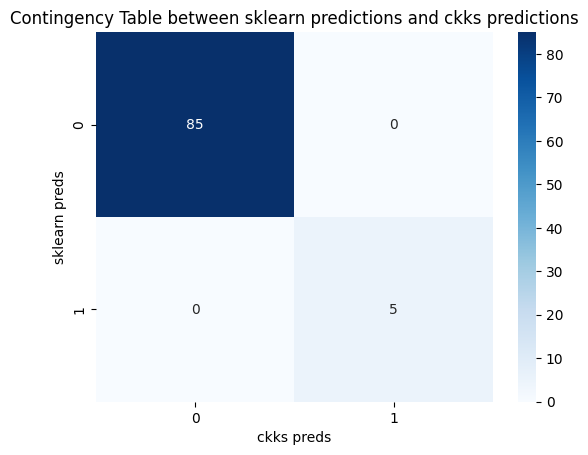

In [15]:
import seaborn as sns
import pandas as pd
data = {'sklearn_preds': y_pred_unenc_sklearn, 'ckks_preds': y_pred_unenc_ckks}
df = pd.DataFrame(data)
contingency_table = pd.crosstab(df['sklearn_preds'], df['ckks_preds'])
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='Blues')

plt.xlabel('ckks preds')
plt.ylabel('sklearn preds')
plt.title('Contingency Table between sklearn predictions and ckks predictions')

plt.show()

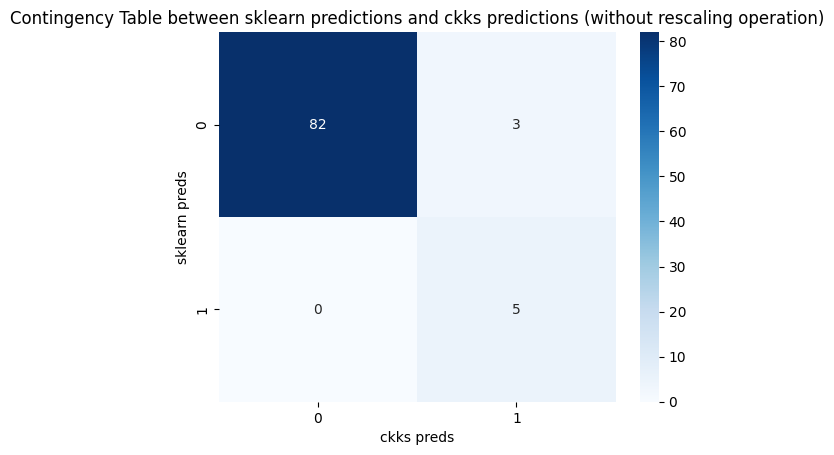

In [16]:
data = {'sklearn_preds': y_pred_unenc_sklearn, 'ckks_preds': y_pred_unenc_ckks2}
df = pd.DataFrame(data)
contingency_table = pd.crosstab(df['sklearn_preds'], df['ckks_preds'])
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='Blues')

plt.xlabel('ckks preds')
plt.ylabel('sklearn preds')
plt.title('Contingency Table between sklearn predictions and ckks predictions (without rescaling operation)')

plt.show()

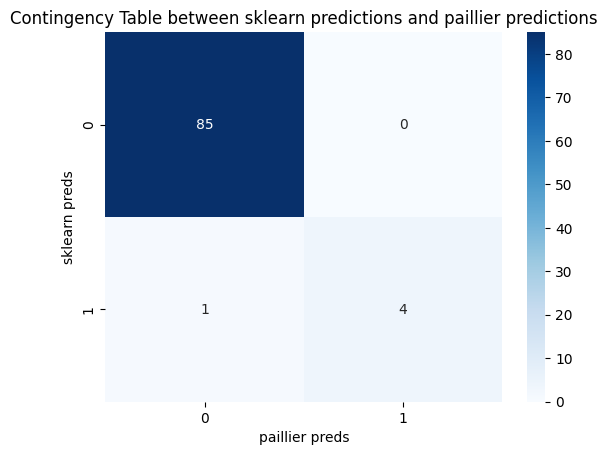

In [17]:

data = {'sklearn_preds': y_pred_unenc_sklearn, 'paillier_preds': y_pred_unenc_paillier}
df = pd.DataFrame(data)
contingency_table = pd.crosstab(df['sklearn_preds'], df['paillier_preds'])
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='Blues')

plt.xlabel('paillier preds')
plt.ylabel('sklearn preds')
plt.title('Contingency Table between sklearn predictions and paillier predictions')

plt.show()

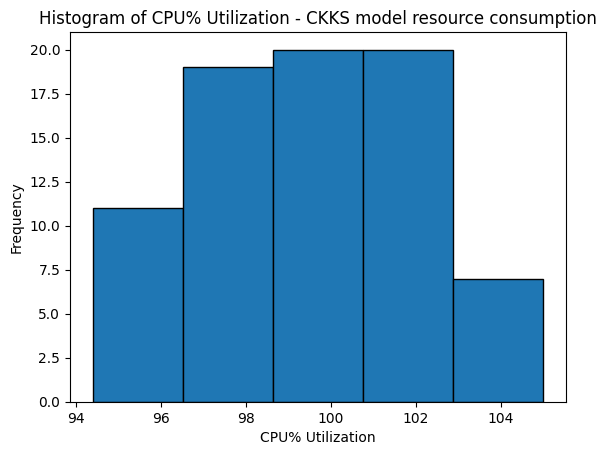

In [18]:
# Plot the histogram

filtered_ckks_cpu_util = [x for x in cpu_usages_ckks if x >= 70]

plt.hist(filtered_ckks_cpu_util, bins=5, edgecolor='black')  # You can adjust the number of bins as needed

# Add titles and labels
plt.title('Histogram of CPU% Utilization - CKKS model resource consumption')
plt.xlabel('CPU% Utilization')
plt.ylabel('Frequency')

# Show the plot
plt.show()

In [19]:
print(np.mean(filtered_ckks_cpu_util))
print(np.median(filtered_ckks_cpu_util))

99.58441558441558
99.8


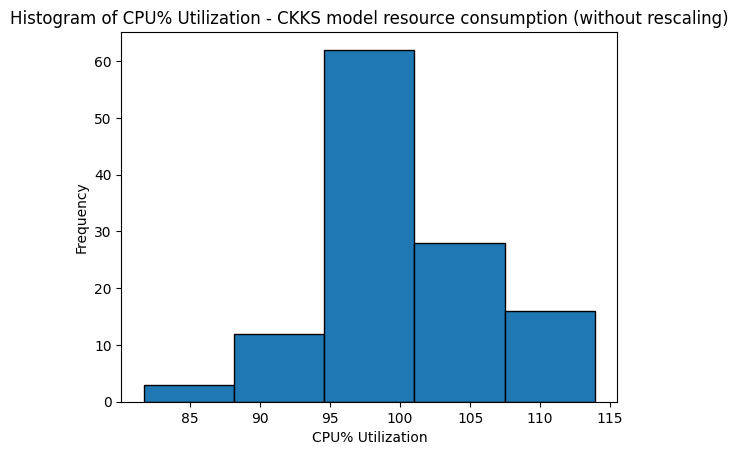

In [20]:
# Plot the histogram

filtered_ckks_cpu_util2 = [x for x in cpu_usages_ckks2 if x >= 70]

plt.hist(filtered_ckks_cpu_util2, bins=5, edgecolor='black')  # You can adjust the number of bins as needed

# Add titles and labels
plt.title('Histogram of CPU% Utilization - CKKS model resource consumption (without rescaling)')
plt.xlabel('CPU% Utilization')
plt.ylabel('Frequency')

# Show the plot
plt.show()

In [21]:
print(np.mean(filtered_ckks_cpu_util2))
print(np.median(filtered_ckks_cpu_util2))

100.47107438016529
99.5


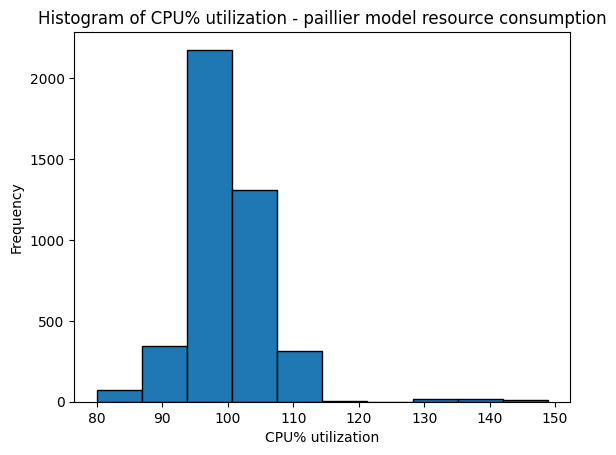

In [22]:
# Plot the histogram

filtered_paillier_cpu_util = [x for x in cpu_usages_paillier if x >= 80]

plt.hist(filtered_paillier_cpu_util, bins=10, edgecolor='black')  # You can adjust the number of bins as needed

# Add titles and labels
plt.title('Histogram of CPU% utilization - paillier model resource consumption')
plt.xlabel('CPU% utilization')
plt.ylabel('Frequency')

# Show the plot
plt.show()

In [23]:
print(np.mean(filtered_paillier_cpu_util))
print(np.median(filtered_paillier_cpu_util))

100.13826086956522
99.6


Text(0.5, 1.0, 'Line Graph of ram% util for ckks model')

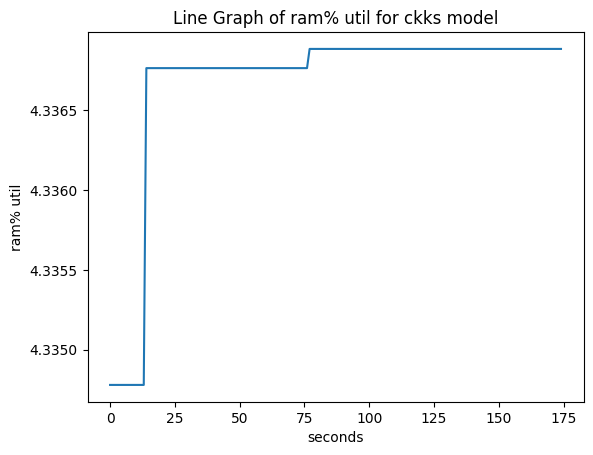

In [24]:
plt.plot(ram_usages_ckks)

# Add labels and title
plt.xlabel('seconds')
plt.ylabel('ram% util')
plt.title('Line Graph of ram% util for ckks model')

In [25]:
print(np.mean(ram_usages_ckks))
print(np.median(ram_usages_ckks))

4.336673373231625
4.336885254535961


Text(0.5, 1.0, 'Line Graph of ram% util for ckks model without rescaling')

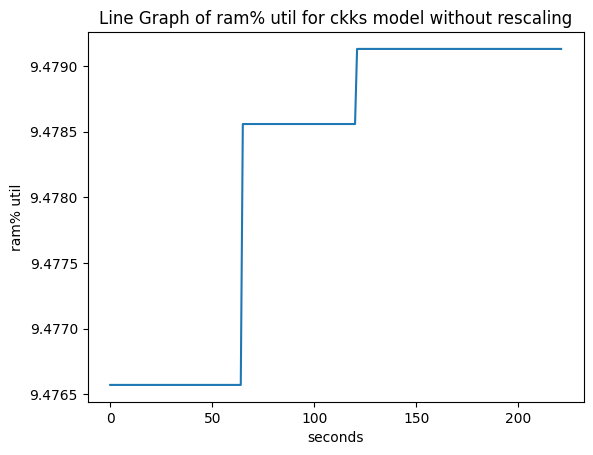

In [26]:
plt.plot(ram_usages_ckks2)

# Add labels and title
plt.xlabel('seconds')
plt.ylabel('ram% util')
plt.title('Line Graph of ram% util for ckks model without rescaling')

In [27]:
print(np.mean(ram_usages_ckks2))
print(np.median(ram_usages_ckks2))

9.47823686523476
9.478558304227242


Text(0.5, 1.0, 'Line Graph of ram% util for paillier model')

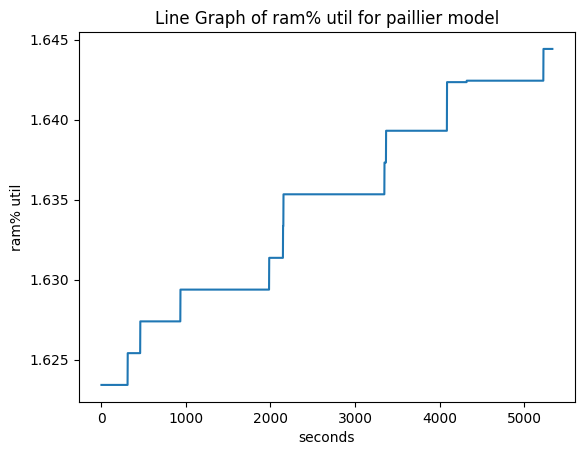

In [28]:
plt.plot(ram_usages_paillier)

# Add labels and title
plt.xlabel('seconds')
plt.ylabel('ram% util')
plt.title('Line Graph of ram% util for paillier model')

In [29]:
print(np.mean(ram_usages_paillier))
print(np.median(ram_usages_paillier))

1.6346058032211268
1.635338430723993


In [30]:
np.mean(ram_usages_sklearn)

1.5451684892772712

In [31]:
train_time_ckks

83.00982928276062

In [32]:
train_time_ckks2

149.87490844726562

In [33]:
train_time_paillier

5284.155116558075

In [34]:
testing_time_ckks

2.1495754718780518

In [35]:
testing_time_ckks2

5.50512433052063

In [36]:
testing_time_paillier

241.5288782119751

In [37]:
print(f"accuracy sklearn model: {accuracy_sklearn}")
print(f"accuracy ckks model (with manual rescaling): {accuracy_ckks}")
print(f"accuracy ckks model (without rescaling): {accuracy_ckks2}")
print(f"accuracy paillier model: {accuracy_paillier}")

accuracy sklearn model: 0.8333333333333334
accuracy ckks model (with manual rescaling): 0.8333333333333334
accuracy ckks model (without rescaling): 0.8222222222222222
accuracy paillier model: 0.8222222222222222
